In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [ ]:
iris=load_iris()
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = trans.fit_transform(iris.data)
# Посмотрим на данные
from pandas import DataFrame
dataset = DataFrame(data)
print(dataset.describe())

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     0.428704    0.440556    0.467458    0.458056
std      0.230018    0.181611    0.299203    0.317599
min      0.000000    0.000000    0.000000    0.000000
25%      0.222222    0.333333    0.101695    0.083333
50%      0.416667    0.416667    0.567797    0.500000
75%      0.583333    0.541667    0.694915    0.708333
max      1.000000    1.000000    1.000000    1.000000


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
skf = StratifiedKFold(n_splits=5)
mlp = MLPClassifier(random_state=0, max_iter=200)
results = cross_val_score(mlp, iris.data, iris.target, cv=skf)
print(results)

best=0
for alpha in [0.1, 0.01, 0.0001]:
  for hidden_layer_sizes in [(10,10,10),(100,100,100),(100,100)]:
    for solver in ["lbfgs","adam","sgd"]:
      for activation in ["relu","logistic"]:
        skf=StratifiedKFold(n_splits=5)
        mlp=MLPClassifier(random_state=0, max_iter=200, alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, solver=solver, activation=activation)
        results=cross_val_score(mlp, iris.data, iris.target, cv=skf)
        if np.mean(results)>best:
          best=np.mean(results)
          best_params = {'alpha': alpha, 'hidden_layer_sizes' : hidden_layer_sizes, 'solver': solver, 'activation': activation }
print(best, best_params)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"alpha": [0.1, 0.01, 0.0001],
          "hidden_layer_sizes": [(10,10,10),
                                 (100,100,100),
                                 (100,100)],
          "solver" : ["lbfgs","adam","sgd"],
          "activation": ["relu","logistic"]}
mlp = MLPClassifier(random_state=1, max_iter=300)
mlpc_cv_model = GridSearchCV(mlp, params,
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
mlpc_cv_model.fit(X_train, y_train)
print(mlpc_cv_model.score(X_test, y_test))
print(mlpc_cv_model.best_estimator_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.9736842105263158
MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100), max_iter=300, random_state=1)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
results = pd.DataFrame(mlpc_cv_model.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.273356,0.022772,0.001440,0.000525,relu,0.1,"(10, 10, 10)",lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,20
1,0.232632,0.006269,0.001335,0.000261,relu,0.1,"(10, 10, 10)",adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.695652,0.695652,0.681818,0.636364,0.681818,0.678261,0.021843,40
2,0.204248,0.002747,0.001272,0.000174,relu,0.1,"(10, 10, 10)",sgd,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,37
3,1.165491,0.120368,0.001782,0.000673,relu,0.1,"(100, 100, 100)",lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,20
4,0.479501,0.053885,0.001016,0.000015,relu,0.1,"(100, 100, 100)",adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",1.000000,0.956522,1.000000,0.954545,0.954545,0.973123,0.021957,2


In [ ]:
!pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 12.8 MB/s eta 0:00:00


In [ ]:
scores=np.array(results.mean_test_score).reshape(3, 3, 3, 2)
mglearn.tools.heatmap(scores, xlabel='alpha', xticklabels=params['alpha'], ylabel='solver', yticklabels=params['solver'], cmap="viridis")

TypeError: heatmap() got an unexpected keyword argument 'zticklabels'

In [ ]:
results=results[["param_activation", "param_alpha", "param_hidden_layer_sizes", "param_solver", "mean_test_score" ]]
results

,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,mean_test_score
0,relu,0.1,"(10, 10, 10)",lbfgs,0.964032
1,relu,0.1,"(10, 10, 10)",adam,0.678261
2,relu,0.1,"(10, 10, 10)",sgd,0.696443
3,relu,0.1,"(100, 100, 100)",lbfgs,0.964032
4,relu,0.1,"(100, 100, 100)",adam,0.973123
5,relu,0.1,"(100, 100, 100)",sgd,0.972727
6,relu,0.1,"(100, 100)",lbfgs,0.964032
7,relu,0.1,"(100, 100)",adam,0.973123
8,relu,0.1,"(100, 100)",sgd,0.963636
9,relu,0.01,"(10, 10, 10)",lbfgs,0.964032


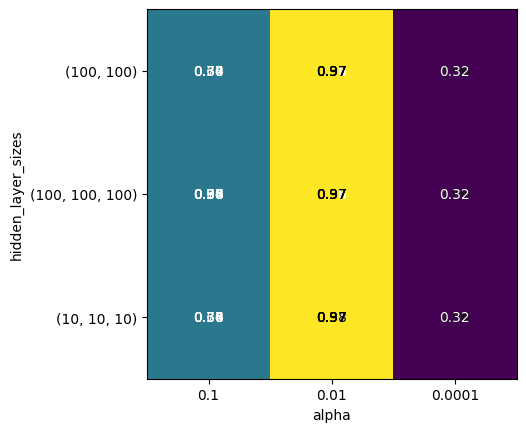

In [ ]:

for solver in ["lbfgs","adam","sgd"]:
  for activation in ["relu","logistic"]:
    data_act=results[results['param_solver']==solver]
    data_act= data_act[data_act['param_activation']==activation ]
    papa=np.array(data_act.mean_test_score).reshape(3, 3)
    mglearn.tools.heatmap(papa, xlabel='alpha', xticklabels=params['alpha'], ylabel='hidden_layer_sizes', yticklabels=params['hidden_layer_sizes'], cmap="viridis")